### importing libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

### importing data

In [49]:
data= pd.read_csv('sonar.all-data.csv', header=None) 
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [50]:
#missing value checking
data.isnull().sum().sum()

0

In [51]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [52]:
#target value
data.iloc[:,-1].unique()

array(['R', 'M'], dtype=object)

In [53]:
#Turning ROCK and MINE into 0 and 1 (binary)
data= data.replace(to_replace="R", value=0, regex=True)
data= data.replace(to_replace="M", value=1, regex=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [54]:
#train-test data
X= data.iloc[:,:-1]
y= data.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.2, random_state=0)

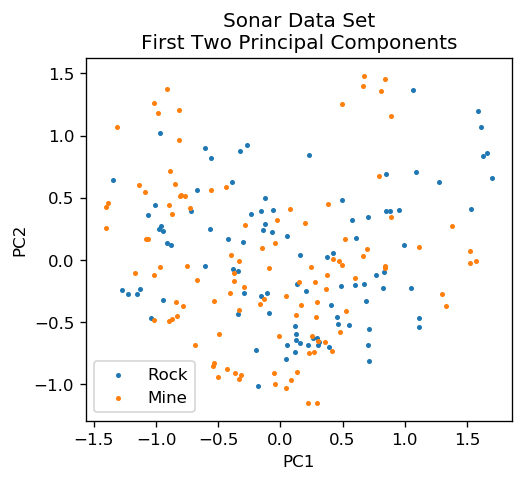

In [55]:
#visualizing for 2 Principal Components representing features

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)
plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=1, label='Rock', s=4)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=1, label='Mine', s=4)
plt.legend()
plt.title('Sonar Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

In [56]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('test score: {:.4f}'.format(knn.score(X_test, y_test)))

train score: 0.6987
test score: 0.6346


In [57]:
#scaling the data for better accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
knn.fit(X_train_scaled, y_train)
print('train score: {:.4f}'.format(knn.score(X_train_scaled, y_train)))
print('test score: {:.4f}'.format(knn.score(X_test_scaled, y_test)))

train score: 0.7115
test score: 0.6346


In [59]:
knn_prediction = knn.predict(X_test_scaled)
cm= confusion_matrix(y_test, knn_prediction)
print(cm)


[[15 11]
 [ 8 18]]


When K = 1, the prediction is sensitive to noise, outliers, mislabeled data, and other sources of variation in individual data points.For larger values of K, the areas assigned to different classes are smoother and not as fragmented and more robust to noise in the individual points. But possibly with some mistakes, more mistakes in individual points. This is an example of what's known as the bias variance tradeoff.

([<matplotlib.axis.XTick at 0x1fd11af7da0>,
 <a list of 5 Text xticklabel objects>)

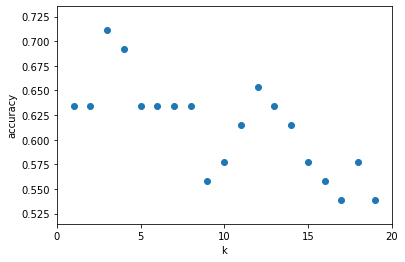

In [60]:
#trying k values for best score
scores=[]
k_range = range(1,20)
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [61]:
scores

[0.6346153846153846,
 0.6346153846153846,
 0.7115384615384616,
 0.6923076923076923,
 0.6346153846153846,
 0.6346153846153846,
 0.6346153846153846,
 0.6346153846153846,
 0.5576923076923077,
 0.5769230769230769,
 0.6153846153846154,
 0.6538461538461539,
 0.6346153846153846,
 0.6153846153846154,
 0.5769230769230769,
 0.5576923076923077,
 0.5384615384615384,
 0.5769230769230769,
 0.5384615384615384]

In [62]:
print("max score for k=", scores.index(max(scores)) +1,"\n","max score=", max(scores))

max score for k= 3 
 max score= 0.7115384615384616


Text(0, 0.5, 'accuracy')

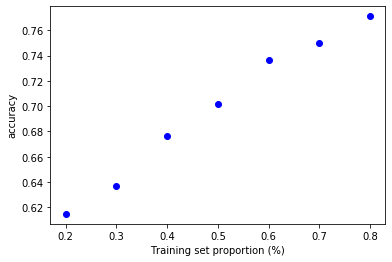

In [63]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,50):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')

In [64]:
log= LogisticRegression().fit(X_train, y_train)
print('logreg train score: {:.3f}'.format(log.score(X_train, y_train)))
print('logreg test score: {:.3f}'.format(log.score(X_test, y_test)))

logreg train score: 0.829
logreg test score: 0.713


In [65]:
lr_prediction = log.predict(X_test)
cm= confusion_matrix(y_test, lr_prediction)
print(cm)
print('Accuracy Score : ' + str(accuracy_score(y_test,lr_prediction)))

[[53 27]
 [21 66]]
Accuracy Score : 0.7125748502994012


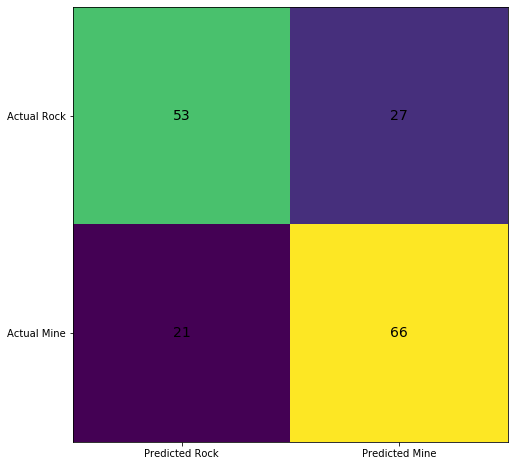

In [66]:
#an alternative to visualize confusion matrix
cm = confusion_matrix(y_test, log.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Rock', 'Predicted Mine'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Rock', 'Actual Mine'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=14)
plt.show()

In [67]:
nb= GaussianNB().fit(X_train, y_train)
print('clf train score: {:.2f}'.format(nb.score(X_train, y_train)))
print('clf test score: {:.2f}'.format(nb.score(X_test, y_test)))

clf train score: 0.85
clf test score: 0.67


In [69]:
nb_prediction= nb.predict(X_test)
cm= confusion_matrix(y_test, nb_prediction)
print(cm)
print('Accuracy Score : ' + str(accuracy_score(y_test,nb_prediction)))

[[60 20]
 [35 52]]
Accuracy Score : 0.6706586826347305


In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
vifs=calc_vif(data)
vifs["VIF"].sort_values(ascending=False)

25    285.092370
26    282.393264
23    278.152914
22    249.346419
24    248.268209
         ...    
54      7.458929
57      6.999059
56      6.667491
53      6.472032
60      5.646787
Name: VIF, Length: 61, dtype: float64

In [71]:
svm= SVC().fit(X_train, y_train) 
print('svm train score: {:.2f}'.format(svm.score(X_train, y_train)))
print('svm test score: {}'.format(svm.score(X_test, y_test)))

svm train score: 0.78
svm test score: 0.6646706586826348


In [72]:
svm_prediction = svm.predict(X_test)
cm = confusion_matrix(y_test, svm_prediction)
print(cm)
print('Accuracy Score : ' + str(accuracy_score(y_test,svm_prediction)))

[[40 40]
 [16 71]]
Accuracy Score : 0.6646706586826348


LinearSVC is another (faster) implementation of Support Vector Classification for the case of a linear kernel. But LinearSVC does not accept parameter kernel, as this is assumed to be linear. It also lacks some of the attributes of SVC, like support_.

In [73]:
svm_2= LinearSVC().fit(X_train, y_train)
print('svm train score: {}'.format(svm_2.score(X_train, y_train)))
print('svm test score: {}'.format(svm_2.score(X_test, y_test)))

svm train score: 0.8780487804878049
svm test score: 0.718562874251497


In [74]:
dt= DecisionTreeClassifier().fit(X_train, y_train) #maxdepth kac dallanma oldugu
print('clf train score: {:.2f}'.format(dt.score(X_train, y_train)))
print('clf test score: {:.2f}'.format(dt.score(X_test, y_test)))

clf train score: 1.00
clf test score: 0.73


In [75]:
dt_prediction = dt.predict(X_test)
cm = confusion_matrix(y_test, dt_prediction)
print(cm)
print('Accuracy Score : ' + str(accuracy_score(y_test,dt_prediction)))

[[57 23]
 [22 65]]
Accuracy Score : 0.7305389221556886


In [76]:
names= X_train.columns
sorted(zip(map(lambda x: round(x, 4), dt.feature_importances_), names), reverse=True)[:10]

[(0.5643, 10),
 (0.2642, 8),
 (0.0961, 38),
 (0.0754, 50),
 (0.0, 59),
 (0.0, 58),
 (0.0, 57),
 (0.0, 56),
 (0.0, 55),
 (0.0, 54)]

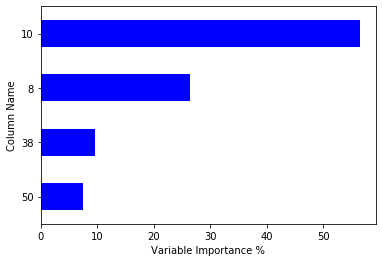

In [77]:
Importance = pd.DataFrame({'Importance':dt.feature_importances_*100},
                         index = X_train.columns)

Importance_nonzero = Importance[(Importance.T != 0).any()]
Importance_nonzero.sort_values(by ='Importance',
                      axis = 0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'b')

plt.xlabel('Variable Importance %')
plt.ylabel("Column Name")
plt.gca().legend_ = None

In [78]:
rf= RandomForestClassifier().fit(X_train, y_train)
print('clf train score: {:.2f}'.format(rf.score(X_train, y_train)))
print('clf test score: {:.2f}'.format(rf.score(X_test, y_test)))

clf train score: 1.00
clf test score: 0.74


In [79]:
rf_prediction = rf.predict(X_test)
cm = confusion_matrix(y_test,rf_prediction)
print(cm)
print('Accuracy Score : ' + str(accuracy_score(y_test,rf_prediction)))

[[58 22]
 [22 65]]
Accuracy Score : 0.7365269461077845


In [80]:
sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)[:10]

[(0.0964, 10),
 (0.0527, 8),
 (0.0513, 48),
 (0.0474, 4),
 (0.0353, 42),
 (0.0345, 46),
 (0.0294, 43),
 (0.0288, 6),
 (0.0264, 11),
 (0.0262, 7)]

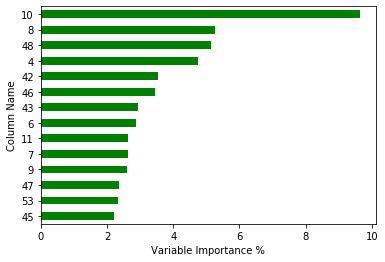

In [81]:
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100},
                         index = X_train.columns)

#filtering less than %2 importance to highlight the most important ones
Importance_mostly = Importance[(Importance.T >= 2).any()]
Importance_mostly.sort_values(by ='Importance',
                      axis = 0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'g')

plt.xlabel('Variable Importance %')
plt.ylabel("Column Name")
plt.gca().legend_ = None

In [82]:
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print('clf train score: {:.2f}'.format(mlp.score(X_train, y_train)))
print('clf test score: {:.2f}'.format(mlp.score(X_test, y_test)))

clf train score: 1.00
clf test score: 0.73


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [83]:
mlp_prediction = mlp.predict(X_test)
cm = confusion_matrix(y_test,mlp_prediction)
print(cm)
print('Accuracy Score : ' + str(accuracy_score(y_test,mlp_prediction)))

[[52 28]
 [17 70]]
Accuracy Score : 0.7305389221556886
